In [1]:
#matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import sqlite3

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine(r'sqlite:///hawaii.sqlite')

In [6]:
connection = engine.connect()

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Assign the classes to a variable called `measurement and station`
measurement = Base.classes.measurement
station = Base.classes.station

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [12]:
# Display the row's columns and data in dictionary format
Measurement_query = session.query(Measurement).all()
Station_query = session.query(Station).all()

In [13]:
Measurement_df = pd.read_sql('SELECT * FROM measurement', session.bind)
Measurement_df

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
5,6,USC00519397,2010-01-07,0.06,70.0
6,7,USC00519397,2010-01-08,0.00,64.0
7,8,USC00519397,2010-01-09,0.00,68.0
8,9,USC00519397,2010-01-10,0.00,73.0
9,10,USC00519397,2010-01-11,0.01,64.0


In [14]:
len(Measurement_df)

19550

In [15]:
Station_df = pd.read_sql('SELECT * FROM Station', session.bind)
Station_df

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [16]:
len(Station_df)

9

In [17]:
# Design a query to retrieve the last 12 months - date range = 2016-08-23/2017-08-23
precipitation_12_months= []
for x in Measurement_df.tail(349)['prcp']:#349 because there are dates missing which would throw off the 1-year data req
    precipitation_12_months.append(x)
precipitation_12_months

date_12_months= []
for x in Measurement_df.tail(349)['date']:#349 because there are dates missing which would throw off the 1-year data req
    date_12_months.append(x)
date_12_months

['2016-08-23',
 '2016-08-24',
 '2016-08-25',
 '2016-08-27',
 '2016-08-28',
 '2016-08-29',
 '2016-08-30',
 '2016-08-31',
 '2016-09-01',
 '2016-09-02',
 '2016-09-03',
 '2016-09-04',
 '2016-09-05',
 '2016-09-06',
 '2016-09-07',
 '2016-09-08',
 '2016-09-09',
 '2016-09-10',
 '2016-09-11',
 '2016-09-12',
 '2016-09-13',
 '2016-09-14',
 '2016-09-15',
 '2016-09-16',
 '2016-09-17',
 '2016-09-18',
 '2016-09-19',
 '2016-09-20',
 '2016-09-21',
 '2016-09-22',
 '2016-09-23',
 '2016-09-24',
 '2016-09-25',
 '2016-09-26',
 '2016-09-27',
 '2016-09-28',
 '2016-09-29',
 '2016-09-30',
 '2016-10-01',
 '2016-10-02',
 '2016-10-03',
 '2016-10-04',
 '2016-10-05',
 '2016-10-06',
 '2016-10-07',
 '2016-10-08',
 '2016-10-09',
 '2016-10-10',
 '2016-10-11',
 '2016-10-12',
 '2016-10-13',
 '2016-10-14',
 '2016-10-15',
 '2016-10-16',
 '2016-10-17',
 '2016-10-18',
 '2016-10-19',
 '2016-10-20',
 '2016-10-21',
 '2016-10-22',
 '2016-10-23',
 '2016-10-24',
 '2016-10-25',
 '2016-10-26',
 '2016-10-27',
 '2016-10-28',
 '2016-10-

In [18]:
# Calculate the date 1 year ago from today
from datetime import datetime
from dateutil.relativedelta import relativedelta

One_year_ago = datetime.now() - relativedelta(years=1)
One_year_ago

datetime.datetime(2017, 8, 7, 17, 41, 7, 280471)

In [19]:
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
One_year_data_df = pd.DataFrame(
    {'date': date_12_months,
     'precipitation': precipitation_12_months,
     'station':Measurement_df.tail(349)['station'],
     'tobs':Measurement_df.tail(349)['tobs']
    })
One_year_data_df['precipitation'].fillna(0, inplace=True)
pd.set_option('display.max_rows', 500)
One_year_data_df.reset_index()
# Sort the dataframe by date
One_year_data_df.sort_values(by='date')
One_year_data_df.set_index('date', inplace=True)
One_year_data_df

#dates missing 16-8-26,16-11-18/19, 16+++

,precipitation,station,tobs
date,,,
2016-08-23,0.70,USC00516128,74.0
2016-08-24,1.45,USC00516128,74.0
2016-08-25,0.11,USC00516128,77.0
2016-08-27,0.00,USC00516128,74.0
2016-08-28,2.07,USC00516128,71.0
2016-08-29,0.90,USC00516128,78.0
2016-08-30,0.05,USC00516128,75.0
2016-08-31,2.46,USC00516128,76.0
2016-09-01,0.01,USC00516128,77.0


In [20]:
new_dataset = One_year_data_df.loc[:, ['tobs']]
new_data_set_dict = new_dataset.to_dict(orient='dict')
new_data_set_dict

{'tobs': {'2016-08-23': 74.0,
  '2016-08-24': 74.0,
  '2016-08-25': 77.0,
  '2016-08-27': 74.0,
  '2016-08-28': 71.0,
  '2016-08-29': 78.0,
  '2016-08-30': 75.0,
  '2016-08-31': 76.0,
  '2016-09-01': 77.0,
  '2016-09-02': 75.0,
  '2016-09-03': 75.0,
  '2016-09-04': 73.0,
  '2016-09-05': 76.0,
  '2016-09-06': 73.0,
  '2016-09-07': 74.0,
  '2016-09-08': 74.0,
  '2016-09-09': 75.0,
  '2016-09-10': 75.0,
  '2016-09-11': 71.0,
  '2016-09-12': 72.0,
  '2016-09-13': 75.0,
  '2016-09-14': 73.0,
  '2016-09-15': 73.0,
  '2016-09-16': 73.0,
  '2016-09-17': 76.0,
  '2016-09-18': 75.0,
  '2016-09-19': 70.0,
  '2016-09-20': 70.0,
  '2016-09-21': 73.0,
  '2016-09-22': 73.0,
  '2016-09-23': 73.0,
  '2016-09-24': 77.0,
  '2016-09-25': 76.0,
  '2016-09-26': 74.0,
  '2016-09-27': 74.0,
  '2016-09-28': 77.0,
  '2016-09-29': 77.0,
  '2016-09-30': 73.0,
  '2016-10-01': 74.0,
  '2016-10-02': 73.0,
  '2016-10-03': 76.0,
  '2016-10-04': 74.0,
  '2016-10-05': 75.0,
  '2016-10-06': 75.0,
  '2016-10-07': 73.0,
  

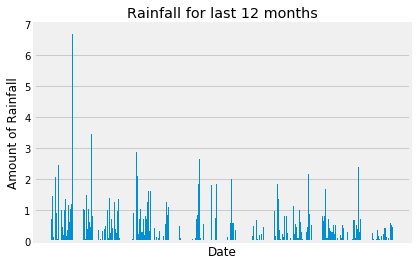

In [21]:
# Use Pandas Plotting with Matplotlib to plot the data
x= date_12_months
y= precipitation_12_months
plt.bar(x,y)
plt.title('Rainfall for last 12 months')
plt.xlabel('Date')
# Rotate the xticks for the dates
plt.xticks([], [])
plt.ylabel('Amount of Rainfall')
plt.savefig('Rainfall for last 12 months')

In [22]:
# Use Pandas to calcualte the summary statistics for the precipitation data
One_year_data_df.describe()

,precipitation,tobs
count,349.000000,349.000000
mean,0.423524,72.091691
std,0.703433,3.762743
min,0.000000,58.000000
25%,0.000000,70.000000
50%,0.130000,72.000000
75%,0.560000,75.000000
max,6.700000,82.000000


In [23]:
# How many stations are available in this dataset?
len(One_year_data_df.drop_duplicates('station'))

1

In [24]:
# What are the most active stations?
# List the stations and the counts in descending order.
One_year_data_df['station'].value_counts()

USC00516128    349
Name: station, dtype: int64

In [25]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
One_year_data_df['tobs'].min()

58.0

In [26]:
One_year_data_df['tobs'].max()

82.0

In [27]:
One_year_data_df['tobs'].mean()

72.09169054441261

In [28]:
# Create the bins in which Data will be held
# Bins are 0, 60, 70, 80, 90, 100
#min = 58, max = 82
bins = [0,58, 60,62,64,66,68,70,72,74,76,78,80,82]#1 more than grp names


# Create the names for the 12 bins
group_names = ["58","60","62","64","66","68","70","72","74","76","78","80","82"]
tobs_data = pd.cut(One_year_data_df["tobs"], bins, labels=group_names)
tobs_data_df = tobs_data.to_frame().reset_index()
tobs_data_df

,date,tobs
0,2016-08-23,74
1,2016-08-24,74
2,2016-08-25,78
3,2016-08-27,74
4,2016-08-28,72
5,2016-08-29,78
6,2016-08-30,76
7,2016-08-31,76
8,2016-09-01,78
9,2016-09-02,76


<function matplotlib.pyplot.show>

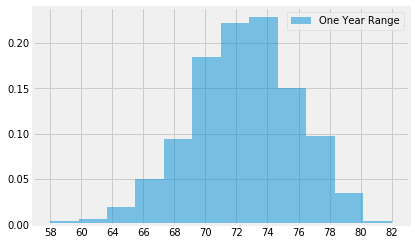

In [29]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Histogram Plot of Data
plt.hist(tobs_data_df['tobs'], 12, density=True, alpha=0.5, label="One Year Range")
plt.legend() 
plt.show

In [31]:
def Temperature_Date_Range(start_date, end_date):
    results = session.query(Measurement.tobs).filter(Measurement.date >= start_date, Measurement.date <= end_date).all()
    results_ra = np.ravel(results)

    minimum = np.min(results_ra)
    average = np.average(results_ra)
    maximum = np.max(results_ra)
    return minimum, average, maximum
Temperature_Date_Range('2016-08-23','2017-08-23')

(58.0, 74.59058295964125, 87.0)

In [38]:
def Temperature_Date_Start(start_date):
    results = session.query(Measurement.tobs).filter(Measurement.date >= start_date).all()
    results_ra = np.ravel(results)

    minimum = np.min(results_ra)
    average = np.average(results_ra)
    maximum = np.max(results_ra)
    return minimum, average, maximum
Temperature_Date_Start('2010-08-23')

(53.0, 73.20383989221355, 87.0)